In [1]:
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

tf.enable_eager_execution()
tf.__version__

'1.14.0'

In [2]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data / 255.
train_data = train_data.reshape(-1, 28, 28, 1)
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)

test_data = test_data / 255.
test_data = test_data.reshape(-1, 28, 28, 1)
test_data = test_data.astype(np.float32)
test_labels = test_labels.astype(np.int32)

In [3]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))

In [4]:
model.compile(optimizer=tf.train.AdamOptimizer(1e-4),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [5]:
# without training, just inference a model in eager execution:
predictions = model(train_data[0:1], training=False)
print("Predictions: ", predictions.numpy())

Predictions:  [[0.08168372 0.10291594 0.09166691 0.09977227 0.09253443 0.10856872
  0.09372684 0.10496214 0.10567338 0.11849567]]


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [7]:
batch_size = 32
max_epochs = 10

# using `numpy type` data
history = model.fit(train_data, train_labels,
                    batch_size=batch_size, epochs=max_epochs,
                    validation_split=0.05)
# using `tf.data.Dataset`
#history = model.fit(train_dataset, epochs=max_epochs,
#                    steps_per_epoch=int(len(train_data) / batch_size))

W0708 08:53:44.089864 139658774640448 deprecation.py:323] From /home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 57000 samples, validate on 3000 samples
Epoch 1/10
57000/57000 [==============================] - 4s 77us/sample - loss: 0.8588 - acc: 0.6983 - val_loss: 0.5847 - val_acc: 0.7757
Epoch 2/10
57000/57000 [==============================] - 4s 69us/sample - loss: 0.5589 - acc: 0.7875 - val_loss: 0.5240 - val_acc: 0.8027
Epoch 3/10
57000/57000 [==============================] - 4s 70us/sample - loss: 0.5019 - acc: 0.8159 - val_loss: 0.4648 - val_acc: 0.8297
Epoch 4/10
57000/57000 [==============================] - 4s 71us/sample - loss: 0.4665 - acc: 0.8307 - val_loss: 0.4540 - val_acc: 0.8380
Epoch 5/10
57000/57000 [==============================] - 4s 70us/sample - loss: 0.4404 - acc: 0.8425 - val_loss: 0.4204 - val_acc: 0.8467
Epoch 6/10
57000/57000 [==============================] - 4s 72us/sample - loss: 0.4212 - acc: 0.8490 - val_loss: 0.4050 - val_acc: 0.8580
Epoch 7/10
57000/57000 [==============================] - 4s 68us/sample - loss: 0.4050 - acc: 0.8547 - val_loss: 0.3

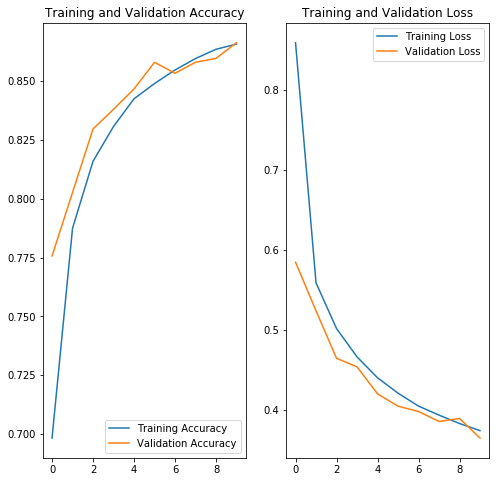

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(max_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
results = model.evaluate(test_data, test_labels, batch_size=batch_size)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3932 - acc: 0.8593
